# Analyzing Speed Humps in Pittsburgh Neighborhoods

In [1]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Speed-humps.csv", index_col = "neighborhood")

In [3]:
data.head(10)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,
Squirrel Hill South,430808404,1,4337.0,Saline St,9257,Asphalt,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
Squirrel Hill South,1520886592,2,NaN,Summerset Dr,15346,NaN,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
North Oakland,858537521,3,511.0,Gold Way,1755,Asphalt,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
North Oakland,297775878,4,547.0,Gold Way,1755,Asphalt,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
North Oakland,1061197751,5,593.0,Gold Way,1755,Asphalt,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
Squirrel Hill South,25169591,10,4224.0,Saline St,4673,Asphalt,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
Brookline,2056880845,11,2146.0,Jacob St,17688,Asphalt,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
Brookline,1735565853,12,2082.0,Jacob St,17688,Asphalt,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
Brookline,857069875,13,2013.0,Jacob St,17688,Asphalt,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401


At this point, we have imported the data on Speed Humps in Pittsburgh neighborhoods from the WPRDC. 

In [4]:
hood = data.groupby("neighborhood").count()
hood

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,
Bloomfield,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Brookline,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Carrick,9,9,9,9,9,8,9,9,9,9,9,9,9,9,9
Central Oakland,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
Garfield,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Highland Park,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Homewood South,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Mount Washington,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
North Oakland,6,6,5,6,6,5,6,6,6,6,6,6,6,6,6


The data is now grouped by the neighborhood and the count of each column is displayed. Here we can see the number of speed humps per neighborhood in the dataset.

In [5]:
hood['hump_id'].sum()

79

There are 79 total speed humps accounted for in the dataset

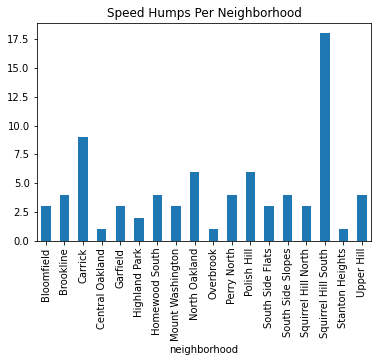

In [6]:
hood['hump_id'].plot.bar(rot = 90, title = 'Speed Humps Per Neighborhood')

The bar chart visualizes the number fo speed humps in each neighborhood in the dataset

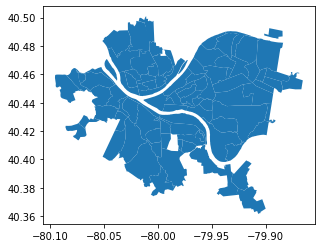

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

In [8]:
humps_map = neighborhoods.merge(hood, how='left', left_on='hood', right_on='neighborhood')
humps_map.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,speed_hump_material,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


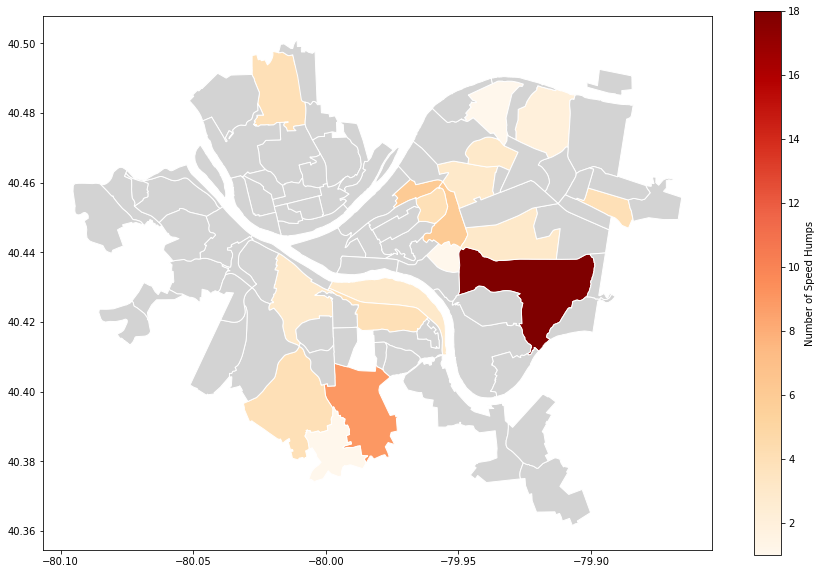

In [9]:
humps_map.plot(column = 'hump_id',
               cmap = 'OrRd',
               legend = True,edgecolor="white",
               missing_kwds={"color": "lightgrey"},
               figsize=(15, 10),
               legend_kwds={'label': "Number of Speed Humps"})
plt.style.use('ggplot')


Using geopandas we can overlay our data on the map of Pittsburgh, showing a heat map of which neihgborhoods are recorded having the most speed humps. The gray neighborhoods have no speed hump data.